# IT 503 Strategic Planning and Management

Nangosha Elisha May21/PGDIT/577U

•	In this test, you will design models to predict the number of deaths due to covid-19 Pandemic in Africas region. 

•	Use python 3.7 or higher for implementation. 

•	Take the screen shots of your codes and upload in the university platform and also share your uploaded codes/output in your Github account with the Instructor.

•	Use the following methodology with respective performance evaluation metrics such as correlations, p-value, and F-1Scores:
1.	Pearson Correlations  (5 marks)
2.	Decision Trees Classifier. (15 marks)



Data set obtained from URL: https://github.com/mkumakech/Covid-19_Pandemic/blob/master/Africa_Covid.csv As at: July 11th 2021 at 6.00 PM

In [1]:
#importing libraries for analysis
! pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [2]:
#load file. This has global regions
Data=pd.read_csv("WHO COVID-19 global table data June 27th 2021 at 6.00 PM.csv",sep=",")
#view first five rows
Data.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,179686071,2305.281168,2565745,32.917207,437764,3899172,50.024399,57897,0.742789,9218,NaN
1,United States of America,Americas,33257768,10047.580000,82369,24.880000,14239,597727,180.580000,2136,0.650000,355,Community transmission
2,India,South-East Asia,30134445,2183.650000,371652,26.930000,51667,393310,28.500000,9820,0.710000,1329,Clusters of cases
3,Brazil,Americas,18169881,8548.140000,541293,254.650000,115228,507109,238.570000,13416,6.310000,2392,Community transmission
4,France,Europe,5655376,8695.310000,11620,17.870000,1796,110001,169.130000,258,0.400000,44,Community transmission


Cleaning of imported Data 

In [3]:
#Extracting only for Africa region
new_file = Data.loc[(Data['WHO Region'] == 'Africa')]
#preview first five rows of new data set
new_file.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
19,South Africa,Africa,1877143,3165.04,91064,153.54,16078,59406,100.16,1083,1.83,148,Community transmission
67,Ethiopia,Africa,275601,239.73,826,0.72,99,4296,3.74,34,0.03,4,Community transmission
81,Kenya,Africa,181239,337.06,3957,7.36,741,3538,6.58,104,0.19,24,Community transmission
83,Nigeria,Africa,167401,81.21,259,0.13,70,2118,1.03,1,0.00,0,Community transmission
87,Zambia,Africa,140620,764.91,18376,99.96,3594,1855,10.09,330,1.80,61,Community transmission


In [4]:
#Renaming some columns to make it easy to read' 
new_file.rename(columns = {'Name':'Country','Cases - cumulative total':'Cases(Cum.Total)', 
                         'Cases - cumulative total per 100000 population':'Cases(Cum.Total)per 100000 population', 
                         'Cases - newly reported in last 7 days':'Cases(last 7 days)', 
                         'Cases - newly reported in last 7 days per 100000 population':'Cases(last 7 days)per 100000 population', 
                         'Cases - newly reported in last 24 hours':'Cases(last 24 hours)', 
                         'Deaths - cumulative total':'Deaths(Cum.Total)','Deaths - cumulative total per 100000 population':
                         'Deaths(Cum.Total) per 100000 population', 'Deaths reported in last 7 days':
                         'Deaths(last 7 days)','Deaths - newly reported in last 7 days per 100000 population':
                         'Deaths(last 7 days)per 100000 population','Deaths - newly reported in last 24 hours':
                         'Deaths(last 24 hours)'}, inplace = True)

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
#First five raws 
new_file.head()

,Country,WHO Region,Cases(Cum.Total),Cases(Cum.Total)per 100000 population,Cases(last 7 days),Cases(last 7 days)per 100000 population,Cases(last 24 hours),Deaths(Cum.Total),Deaths(Cum.Total) per 100000 population,Deaths - newly reported in last 7 days,Deaths(last 7 days)per 100000 population,Deaths(last 24 hours),Transmission Classification
19,South Africa,Africa,1877143,3165.04,91064,153.54,16078,59406,100.16,1083,1.83,148,Community transmission
67,Ethiopia,Africa,275601,239.73,826,0.72,99,4296,3.74,34,0.03,4,Community transmission
81,Kenya,Africa,181239,337.06,3957,7.36,741,3538,6.58,104,0.19,24,Community transmission
83,Nigeria,Africa,167401,81.21,259,0.13,70,2118,1.03,1,0.00,0,Community transmission
87,Zambia,Africa,140620,764.91,18376,99.96,3594,1855,10.09,330,1.80,61,Community transmission


In [6]:
#Data set Summary 
new_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 19 to 233
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   50 non-null     object 
 1   WHO Region                                50 non-null     object 
 2   Cases(Cum.Total)                          50 non-null     int64  
 3   Cases(Cum.Total)per 100000 population     50 non-null     float64
 4   Cases(last 7 days)                        50 non-null     int64  
 5   Cases(last 7 days)per 100000 population   50 non-null     float64
 6   Cases(last 24 hours)                      50 non-null     int64  
 7   Deaths(Cum.Total)                         50 non-null     int64  
 8   Deaths(Cum.Total) per 100000 population   50 non-null     float64
 9   Deaths - newly reported in last 7 days    50 non-null     int64  
 10  Deaths(last 7 days)per 100000 populati

In [7]:
#Countrie in Americas region as per dataset
new_file['WHO Region'].value_counts().to_frame()

,WHO Region
Africa,50


We have 50 countries in Africa region

In [8]:
#Data Set Description 
new_file.describe()

,Cases(Cum.Total),Cases(Cum.Total)per 100000 population,Cases(last 7 days),Cases(last 7 days)per 100000 population,Cases(last 24 hours),Deaths(Cum.Total),Deaths(Cum.Total) per 100000 population,Deaths - newly reported in last 7 days,Deaths(last 7 days)per 100000 population,Deaths(last 24 hours)
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,7.822606e+04,1060.529800,3215.760000,45.727200,610.260000,1870.3800,12.735600,49.460000,0.533800,8.380000
std,2.653622e+05,2523.380276,13082.564441,155.697475,2367.162193,8358.0771,21.314941,163.081701,1.534344,25.245642
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,6.333500e+03,101.417500,38.750000,0.837500,0.250000,116.2500,1.197500,0.000000,0.000000,0.000000
50%,1.995850e+04,230.955000,243.000000,2.670000,14.000000,255.5000,3.170000,3.000000,0.035000,0.000000
75%,4.712000e+04,505.582500,947.500000,10.495000,102.000000,902.7500,10.315000,18.000000,0.150000,1.000000
max,1.877143e+06,15364.980000,91064.000000,1004.610000,16078.000000,59406.0000,100.160000,1083.000000,7.790000,148.000000


In [9]:
new_file.shape

(50, 13)

In [10]:
Data.corr()

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Cases - cumulative total,1.000000,0.027569,0.978863,0.010259,0.971479,0.995058,0.054887,0.976867,0.035097,0.972573
Cases - cumulative total per 100000 population,0.027569,1.000000,0.010991,0.357719,0.015625,0.026548,0.718680,0.011532,0.231071,0.013631
Cases - newly reported in last 7 days,0.978863,0.010991,1.000000,0.055610,0.998240,0.983080,0.047521,0.998197,0.092341,0.997081
Cases - newly reported in last 7 days per 100000 population,0.010259,0.357719,0.055610,1.000000,0.062694,0.015148,0.146441,0.053239,0.676276,0.057219
Cases - newly reported in last 24 hours,0.971479,0.015625,0.998240,0.062694,1.000000,0.978802,0.054995,0.996831,0.103809,0.997981
Deaths - cumulative total,0.995058,0.026548,0.983080,0.015148,0.978802,1.000000,0.082230,0.981125,0.049299,0.979466
Deaths - cumulative total per 100000 population,0.054887,0.718680,0.047521,0.146441,0.054995,0.082230,1.000000,0.058554,0.311722,0.060981
Deaths - newly reported in last 7 days,0.976867,0.011532,0.998197,0.053239,0.996831,0.981125,0.058554,1.000000,0.106937,0.999032
Deaths - newly reported in last 7 days per 100000 population,0.035097,0.231071,0.092341,0.676276,0.103809,0.049299,0.311722,0.106937,1.000000,0.112537
Deaths - newly reported in last 24 hours,0.972573,0.013631,0.997081,0.057219,0.997981,0.979466,0.060981,0.999032,0.112537,1.000000


Hypothesis
1. null: Death reported in the last 24 hours are not from cases reported in the last 7 days 
2. Alternative: Death reported in the last 24 hours are from cases reported in the last 7 days 

In [11]:
new_file [['Cases(last 7 days)','Deaths - newly reported in last 7 days']].corr()

,Cases(last 7 days),Deaths - newly reported in last 7 days
Cases(last 7 days),1.000000,0.981895
Deaths - newly reported in last 7 days,0.981895,1.000000


data1: mean=2881.960 stdv=12684.714
data2: mean=2894.043 stdv=12684.284


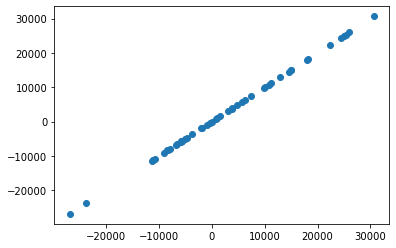

In [12]:
# generate related variables
#data1=cases-newly reported in the last 7 days, std 130, mean 4279 
#data2=Death-newly reported in the last  24 hours

# generate related variables
#data1=cases in last 7days,std=13082.564441,mean=3215.760000
#data2=deaths in last 24 hours, std=25.245642,mean =8.380000

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 13082.564441 * randn(50) + 3215.760000
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

# Covariance

The calculation of the sample covariance is as follows:
 cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

In [13]:
np. cov(data1, data2)

array([[1.64185690e+08, 1.64179925e+08],
       [1.64179925e+08, 1.64174557e+08]])

In [14]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 13082.564441 * randn(50) + 3215.760000
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[1.64185690e+08 1.64179925e+08]
 [1.64179925e+08 1.64174557e+08]]


In [15]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 13082.564441 * randn(50) + 3215.760000
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[1.64185690e+08 1.64179925e+08]
 [1.64179925e+08 1.64174557e+08]]


In [16]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 13082.564441 * randn(50) + 3215.760000
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 1.000


In [17]:
import scipy.stats
r,p=scipy.stats.pearsonr(data1, data2)
r

0.9999987883025226

# Decision Tree Classifier Building in Scikit-learn

Importing Required Libraries
Let's first load the required libraries

In [18]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [19]:
#split dataset in features and target variable
feature_cols = ['Deaths(Cum.Total)', 'Deaths(Cum.Total) per 100000 population', 'Deaths - newly reported in last 7 days', 'Deaths(last 7 days)per 100000 population','Deaths(last 24 hours)']
X = new_file[feature_cols] # Features
y = new_file # Target variable

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

Building Decision Tree Model
 Decision Tree Model using Scikit-learn.

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# The End 

Analysis by Elisha Nangosha Email: nangoshaelisha@gmail.com Contact: 0777514549

